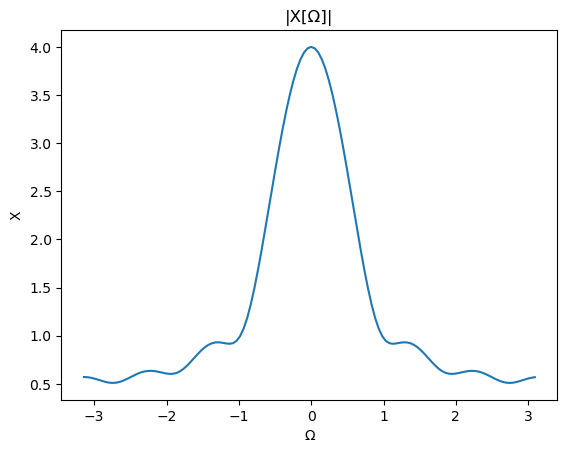

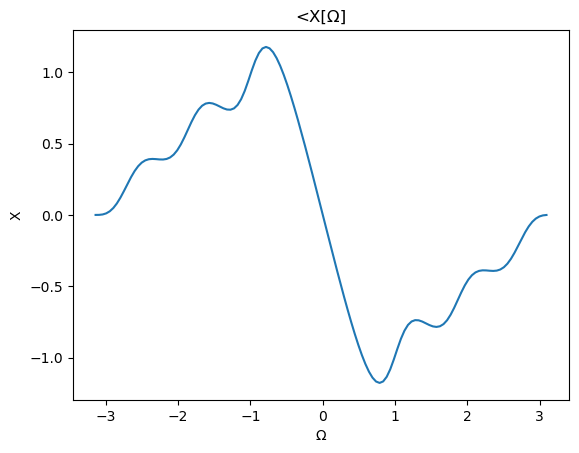

In [4]:
# Part A1

import numpy as np
import matplotlib.pyplot as plt

N0 = 128
n = np.arange(N0)
ohm = (2*np.pi/128)*np.arange(-64, 64)

x = [1, 6/7, 5/7, 4/7, 3/7, 2/7, 1/7] + [0]*121
X = np.fft.fft(x)

plt.figure()
plt.plot(ohm, np.fft.fftshift(np.abs(X)))
plt.title('|X[Ω]|')
plt.xlabel('Ω')
plt.ylabel('X')

plt.figure()
plt.plot(ohm, np.fft.fftshift(np.angle(X)))
plt.title('<X[Ω]')
plt.xlabel('Ω')
plt.ylabel('X')

plt.show()


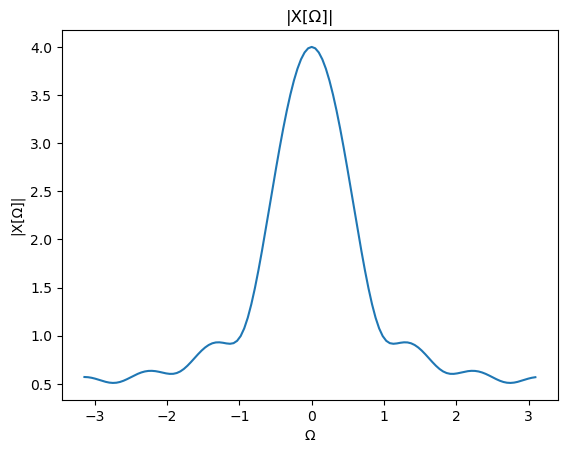

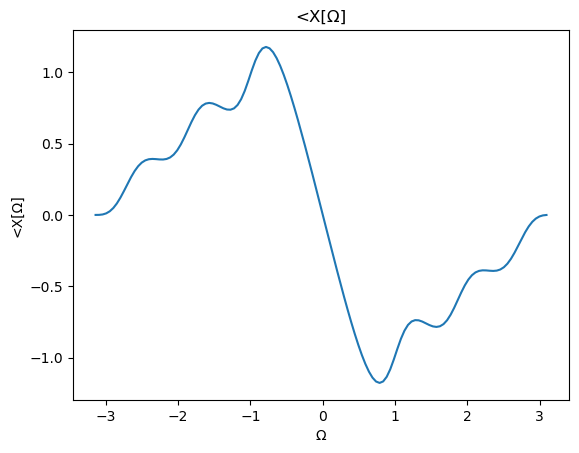

In [7]:
# Part A2

import numpy as np
import matplotlib.pyplot as plt

# Clear command window
from IPython.display import clear_output
clear_output(wait=True)

ohm = (2*np.pi/128)*np.arange(-64, 64)

X = 1 + (6/7)*np.exp(-1j*ohm) \
    + (5/7)*np.exp(-1j*2*ohm) \
    + (4/7)*np.exp(-1j*3*ohm) \
    + (3/7)*np.exp(-1j*4*ohm) \
    + (2/7)*np.exp(-1j*5*ohm) \
    + (1/7)*np.exp(-1j*6*ohm)

plt.figure()
plt.plot(ohm, np.abs(X))
plt.title('|X[Ω]|')
plt.xlabel('Ω')
plt.ylabel('|X[Ω]|')

plt.figure()
plt.plot(ohm, np.angle(X))
plt.title('<X[Ω]')
plt.xlabel('Ω')
plt.ylabel('<X[Ω]')

plt.show()


In [ ]:
# Part A2 by hand:

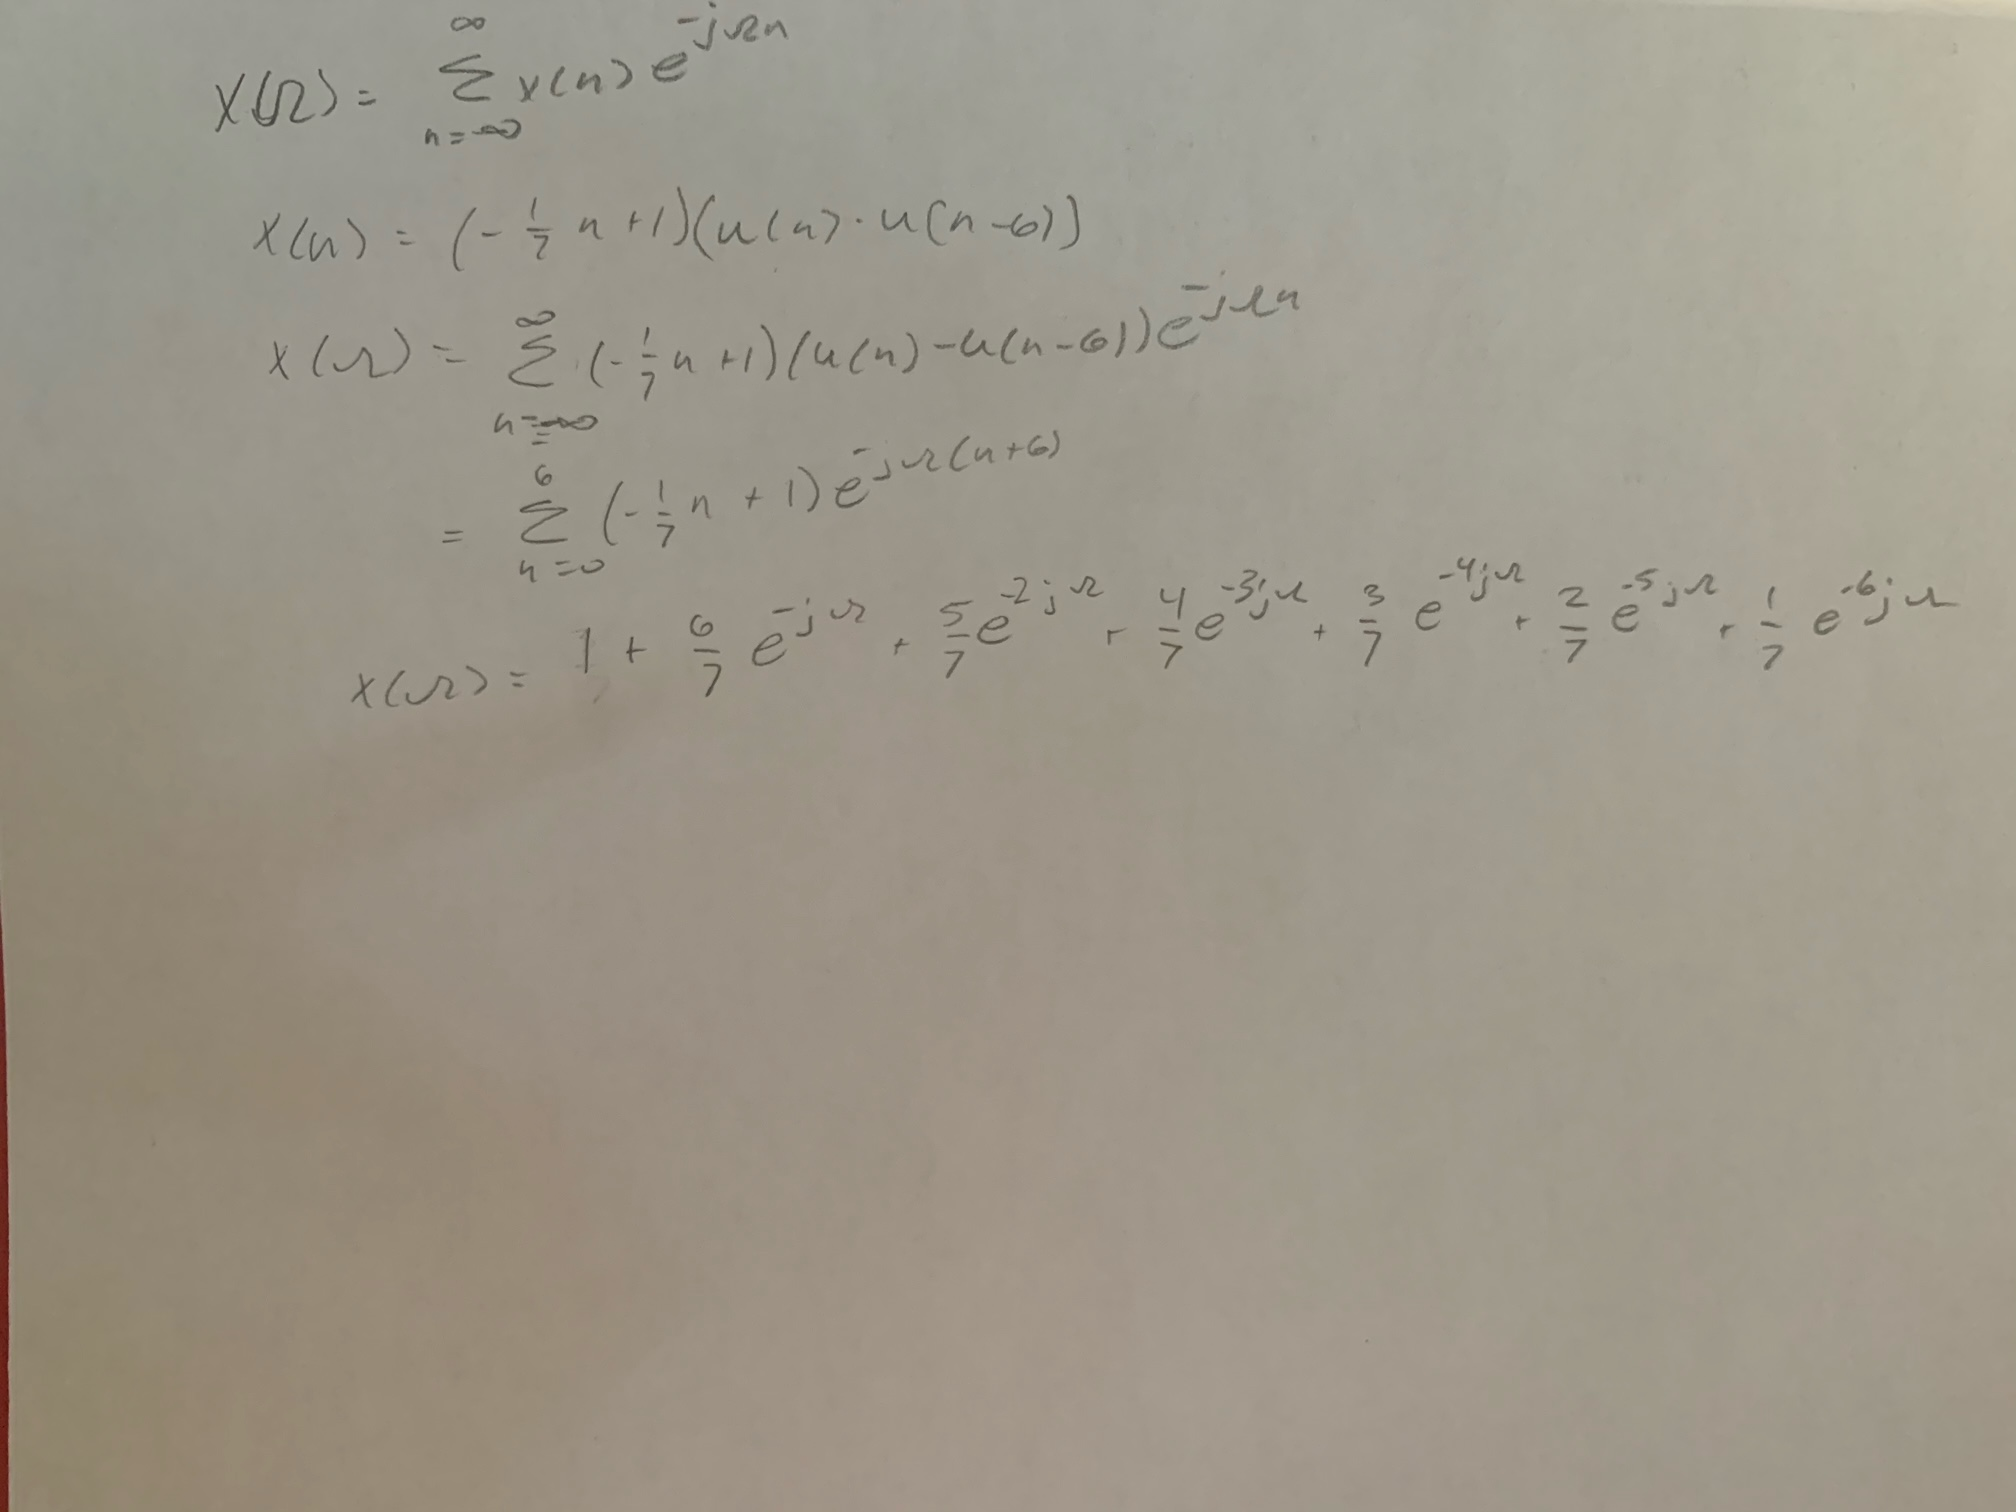

In [ ]:
# Yes the two parts match up!

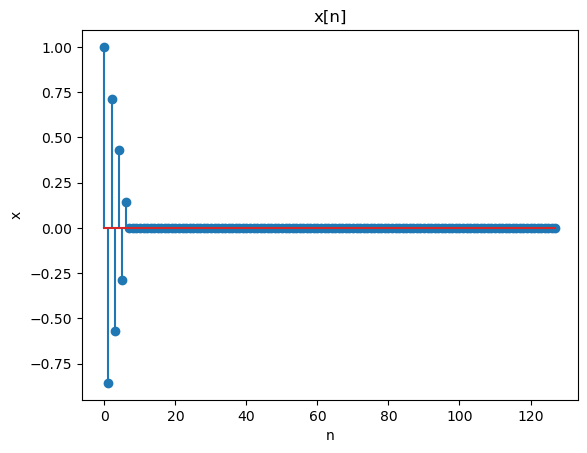

In [8]:
#Part A3

import numpy as np
import matplotlib.pyplot as plt

N0 = 128
n = np.arange(N0)
ohm = (2*np.pi/128)*np.arange(-64, 64)

X = 1 + (6/7)*np.exp(-1j*ohm) + (5/7)*np.exp(-1j*2*ohm) + (4/7)*np.exp(-1j*3*ohm) + (3/7)*np.exp(-1j*4*ohm) \
    + (2/7)*np.exp(-1j*5*ohm) \
    + (1/7)*np.exp(-1j*6*ohm)

x = np.fft.ifft(X)

plt.figure()
plt.stem(n, x.real)
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x')

plt.show()


In [ ]:
# The plots are not identical, This is because it was multiplied by a complex exponential, so it will shift it when
# switching between domains. This would require more commands to get the original signal.

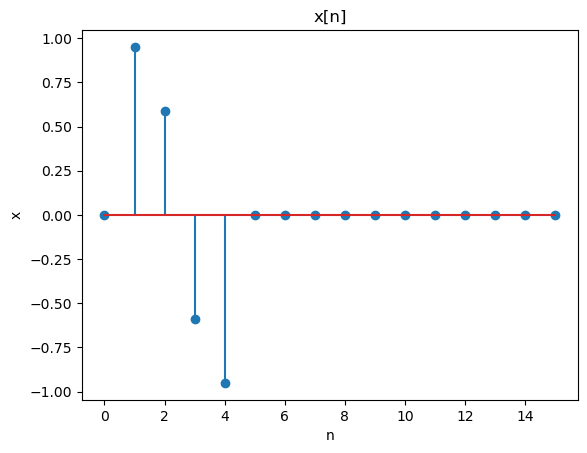

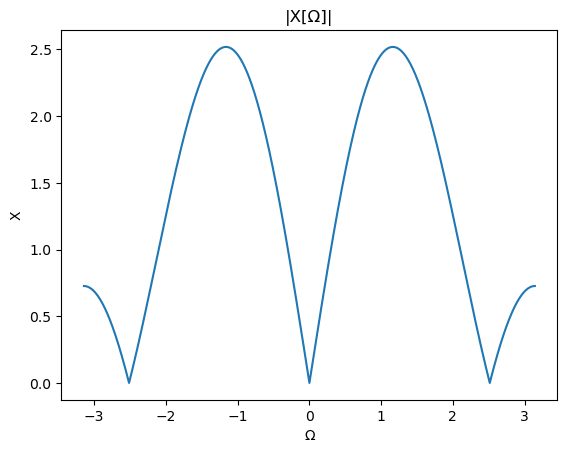

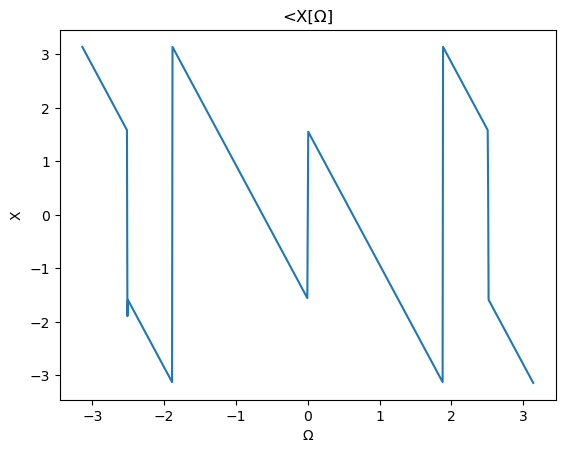

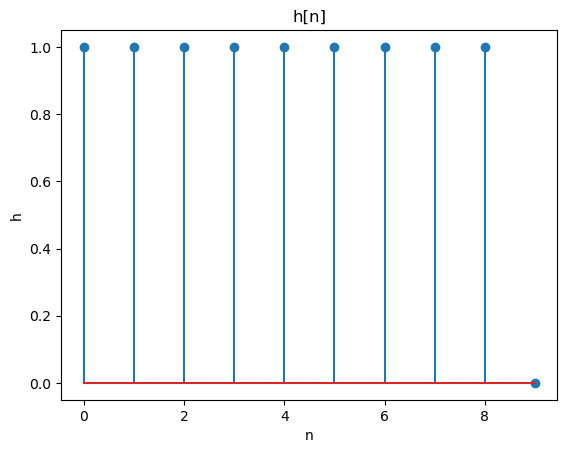

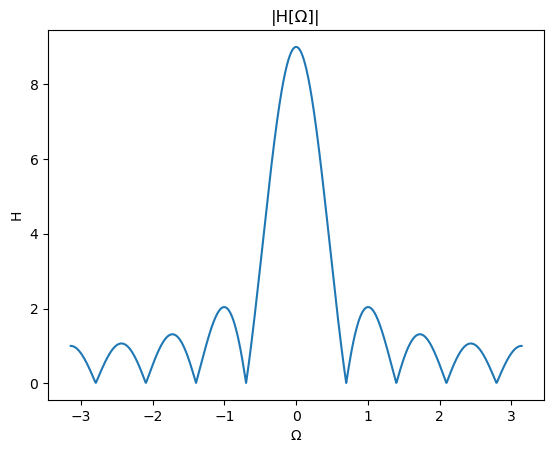

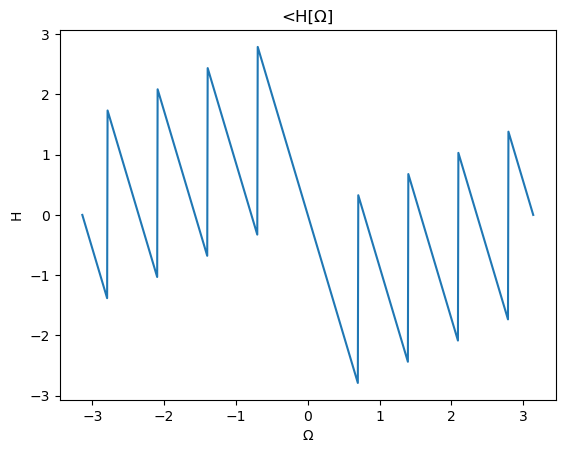

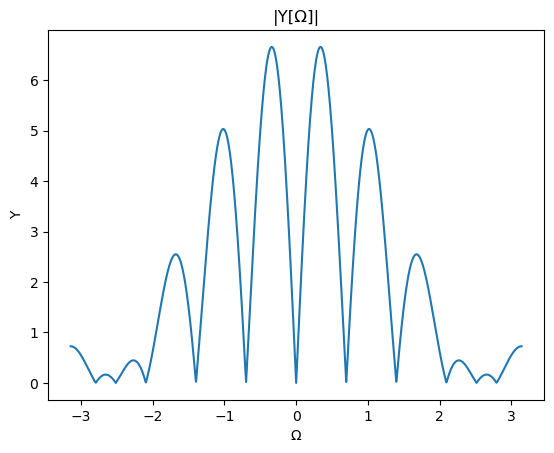

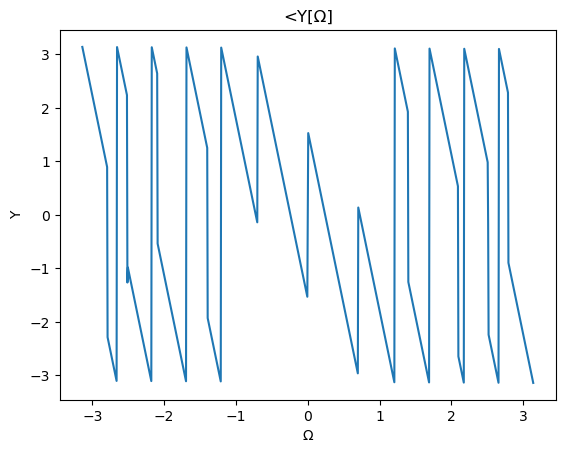

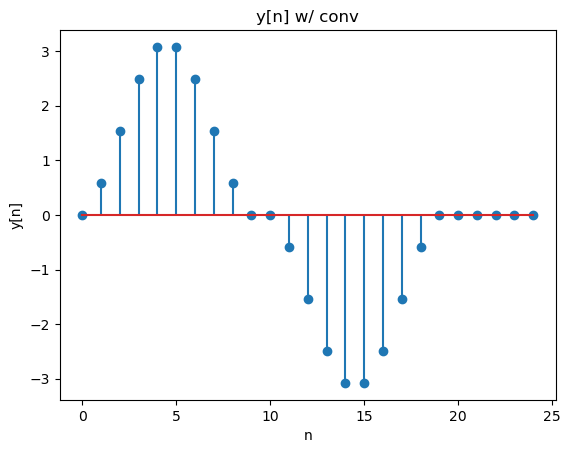

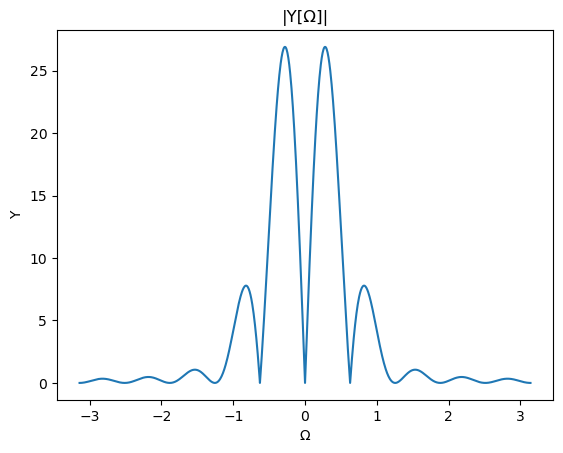

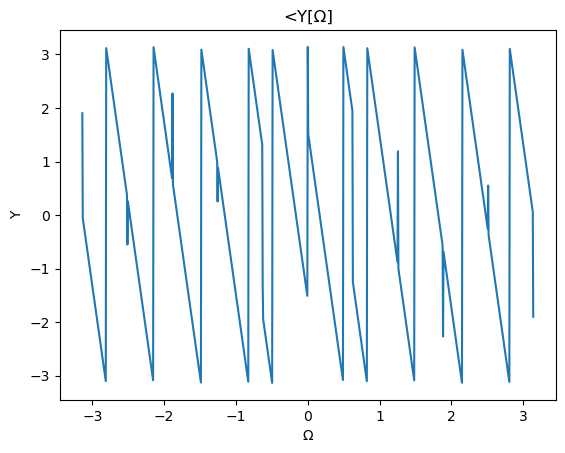

In [27]:
# Part B1,2,3,4,5

# S value is -> 4

import numpy as np
import matplotlib.pyplot as plt

# Part 1
n = np.arange(16)
u_c = lambda t: 1.0 * (t >= 0)
u = lambda n: u_c(n) * (np.mod(n, 1) == 0)
x = np.sin(2 * np.pi * n / 5) * (u(n) - u(n - 5))

omega = np.linspace(-np.pi, np.pi, 1001)
W_omega = np.exp(-1j) ** (np.outer(np.arange(len(x)), omega))
X = np.dot(x, W_omega)

plt.stem(n, x)
plt.title('x[n]')
plt.xlabel('n')
plt.ylabel('x')
plt.show()

plt.plot(omega, np.abs(X))
plt.title('|X[Ω]|')
plt.xlabel('Ω')
plt.ylabel('X')
plt.show()

plt.plot(omega, np.angle(X))
plt.title('<X[Ω]')
plt.xlabel('Ω')
plt.ylabel('X')
plt.show()

# Part 2
n = np.arange(10)
x = np.heaviside(n, 1) - np.heaviside(n-9, 1)

omega = np.linspace(-np.pi, np.pi, 1001)
W_omega = np.exp(-1j*np.outer(np.arange(len(x)), omega))
H = x @ W_omega

plt.stem(n, x)
plt.title('h[n]')
plt.xlabel('n')
plt.ylabel('h')
plt.show()

plt.plot(omega, np.abs(H))
plt.title('|H[Ω]|')
plt.xlabel('Ω')
plt.ylabel('H')
plt.show()

plt.plot(omega, np.angle(H))
plt.title('<H[Ω]')
plt.xlabel('Ω')
plt.ylabel('H')
plt.show()

# Part 3
Y = X * H

plt.plot(omega, np.abs(Y))
plt.title('|Y[Ω]|')
plt.xlabel('Ω')
plt.ylabel('Y')
plt.show()

plt.plot(omega, np.angle(Y))
plt.title('<Y[Ω]')
plt.xlabel('Ω')
plt.ylabel('Y')
plt.show()

# Part 4
n = np.arange(25)
h = np.heaviside(np.arange(10), 1)
x = np.sin(2*np.pi*n/10) * (np.heaviside(n, 1) - np.heaviside(n-10, 1))

y = np.convolve(x, h)

plt.stem(n, y[:25])
plt.title('y[n] w/ conv')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

# Part 5
omega = np.linspace(-np.pi, np.pi, 1001)
W_omega = np.exp(-1j*np.outer(np.arange(len(y)), omega))
Y = y @ W_omega

plt.plot(omega, np.abs(Y))
plt.title('|Y[Ω]|')
plt.xlabel('Ω')
plt.ylabel('Y')
plt.show()

plt.plot(omega, np.angle(Y))
plt.title('<Y[Ω]')
plt.xlabel('Ω')
plt.ylabel('Y')
plt.show()


In [ ]:
# Part B6

# Yes the results are identical in both part 3 and 5, this is because for the fourier transform,
# the conv. of two functions in the time domain is identical to the product in the frequency domain,
# and vice versa

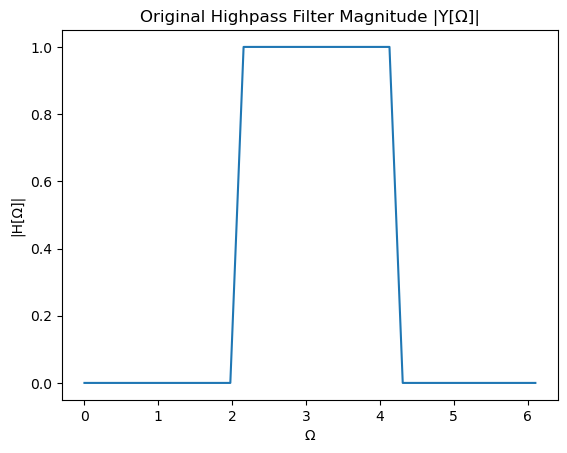

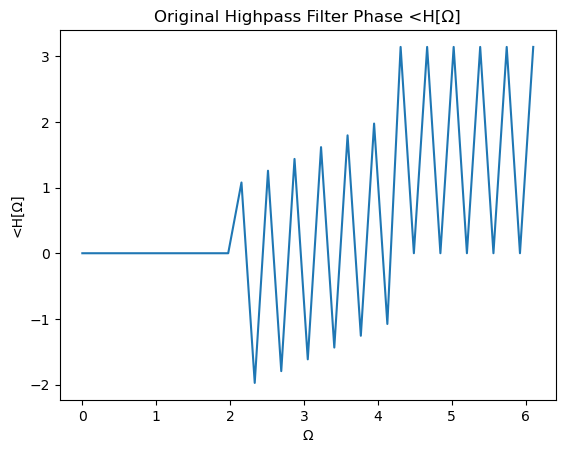

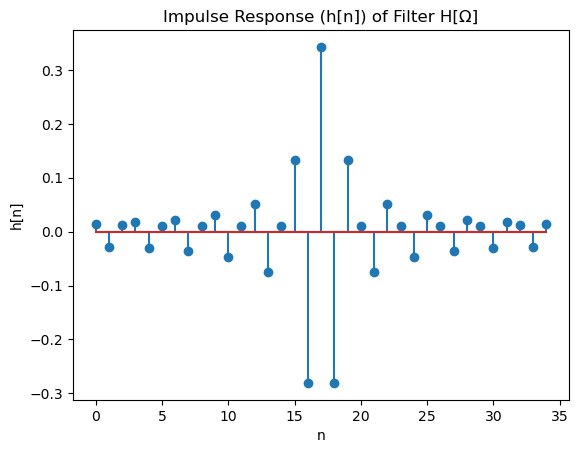

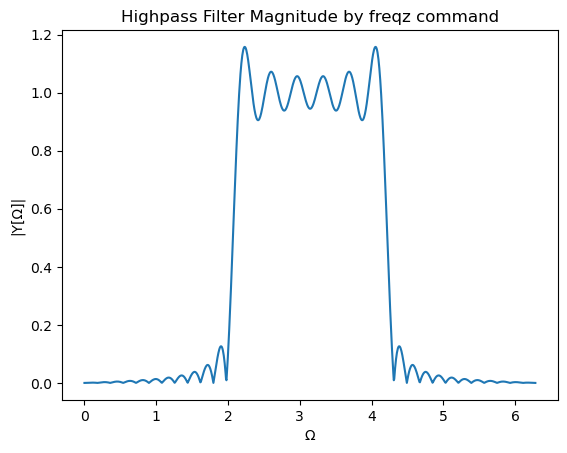

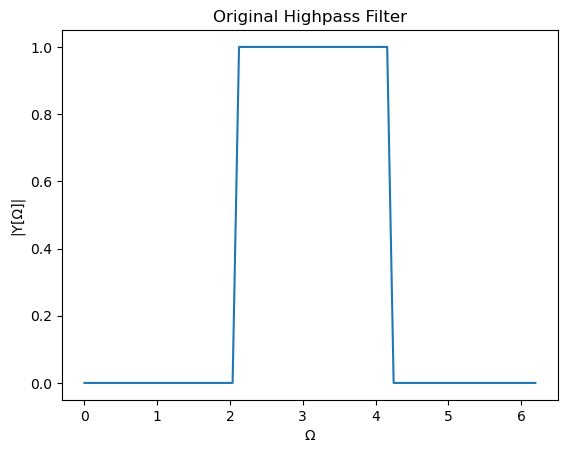

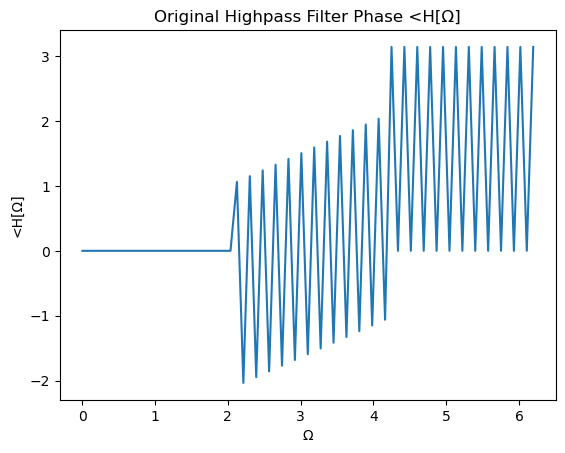

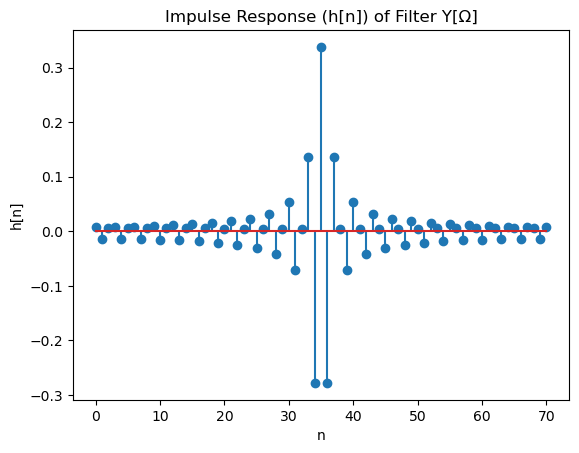

In [34]:
# Part C1,2,4

ohm0 = 2*np.pi/3
N = 35
n = np.arange(N)
Omega = np.linspace(0,2*np.pi*(1-1/N),N)
H_d = lambda Omega: (np.mod(Omega,2*np.pi) > ohm0) * (np.mod(Omega,2*np.pi) < 2*np.pi - ohm0)

H = H_d(Omega) * np.exp(-1j * Omega * ((N-1)/2))
h = np.fft.ifft(H)

plt.figure()
plt.plot(Omega, abs(H))
plt.title('Original Highpass Filter Magnitude |Y[Ω]|')
plt.xlabel('Ω')
plt.ylabel('|H[Ω]|')

plt.figure()
plt.plot(Omega, np.angle(H))
plt.title('Original Highpass Filter Phase <H[Ω]')
plt.xlabel('Ω')
plt.ylabel('<H[Ω]')

plt.figure()
plt.stem(n, h)
plt.title('Impulse Response (h[n]) of Filter H[Ω]')
plt.xlabel('n')
plt.ylabel('h[n]')

H = np.fft.fft(h, 1001)
Omega_H = np.linspace(0, 2*np.pi, 1001)
plt.figure()
plt.plot(Omega_H, abs(H))
plt.title('Highpass Filter Magnitude by freqz command')
plt.xlabel('Ω')
plt.ylabel('|Y[Ω]|')

plt.show()

ohm0 = 2*np.pi/3
N = 71
n = np.arange(N)
Omega = np.linspace(0, 2*np.pi*(1-1/N), N)
H_d = lambda Omega: (np.mod(Omega, 2*np.pi) > ohm0) * (np.mod(Omega, 2*np.pi) < 2*np.pi - ohm0)

H = H_d(Omega) * np.exp(-1j*Omega*((N-1)/2))
h = np.fft.ifft(H)

plt.figure()
plt.plot(Omega, np.abs(H))
plt.title('Original Highpass Filter')
plt.xlabel('Ω')
plt.ylabel('|Y[Ω]|')

plt.figure()
plt.plot(Omega, np.angle(H))
plt.title('Original Highpass Filter Phase <H[Ω]')
plt.xlabel('Ω')
plt.ylabel('<H[Ω]')

plt.figure()
plt.stem(n, h)
plt.title('Impulse Response (h[n]) of Filter Y[Ω]')
plt.xlabel('n')
plt.ylabel('h[n]')

plt.show()


In [ ]:
#Part C3

# The result in part 2 is different from the ideal filter we started with based on the 
# allowed frequencies. The ideal filter has a strict cutoff frequency, without any leeway, 
# whereas the part 2 plot has ripples beyond cutoff frequency desired in other sections and even if that part. 
# This is because impulse response of an ideal highpass filter is noncausal and unrealizable

In [ ]:
#Part C5

# Increasing N increases the 'resolution' as we get a more accurate representation of the 
# impulse response due to the existance of more points and a more accurate representation, as more 'peaks' are
# plotted, closer together, meaning each one will conform closer and closer to the original signal.